<a href="https://colab.research.google.com/github/AlcoholWolf/PY-SAVE/blob/main/ch05_04_%EA%B8%B0%EC%B4%88%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_Perceptron_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.04. 기초모델 구현 - Perceptron
---
* 날짜:
* 이름:

## 학습내용
    - 이진 분류 개념에 대해 이해한다.
    - Perceptron의 프로세스를 이해한다 
    - Perceptron 알고리즘을 구현한다.

```
import numpy as np
import matplotlib.pyplot as plt
```

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/content/drive/MyDrive/py model')

In [30]:
from data_loader import iris_loader

## 클래스 작성
---

In [72]:
class Perceptron():
    def __init__(self, lr=0.001, random_state=1):
        self.lr=lr # 기본이 되는 변수범위값
        self.seed = np.random.RandomState(random_state) # 랜덤한 값을 지정

    def init_weights(self, X):
        size = X.shape[1] # X의 범위
        self.w = self.seed.normal(0, 0.01, size=size+1) # 변수 랜덤

    def model(self, X):
        fx_model = np.dot(X, self.w[:-1]) + self.w[-1] # dot으로 계산
        return fx_model

    def predict(self, X):
        y_hat = self.model(X)
        logit = np.where(y_hat >= 0.5, 1, 0) # y_hat을 05 기준으로 크면 1 작으면 0 (이진분류) 하기.
        return logit

    def loss(self, y, y_logit):
        fx_loss = np.abs(y-y_logit) # 절대값 지정
        return fx_loss

    def accuracy(self, y, y_logit):
        fx_acc = np.count_nonzero( y == y_logit ) / len( y ) # 0이 아닌 모든것을 카운트 // 무조건 y = 을 붙여야 하는가? y_logit 에다가.
        return fx_acc

    def evaluate(self, X, y):
        y_logit = self.predict(X)
        loss = self.loss(y, y_logit) # 로스값 구하기
        lossmin = np.sum(loss)/len(y) # 로스값의 평균
        acc = self.accuracy(y, y_logit)
        return lossmin, acc

    def fit(self, X, y, epochs=20, show_params=False): # epochs : 샘플을 몇번 볼것인가

        self.init_weights(X) # 가중치 초기화
        self.history=dict(loss=[], acc=[]) # history 초기화

        for epoch in range(epochs):    

            for xi, yi in zip(X, y):

                y_logit = self.predict(xi)
                self.w[:-1] += self.lr * (yi - y_logit) * xi # xi 뺀 나머지는 모두 R인데 xi만 V
                self.w[-1] += self.lr * (yi - y_logit) # 여기까지가 최적화



          # 평가 및 결과 저장
        loss, acc = self.evaluate(X, y)
        self.history['loss'].append(loss)
        self.history['acc'].append(acc)
        print(f'[Epoch {epoch}] loss: {np.round(loss,2)}  acc: {np.round(acc,2)}')
        if show_params: print(self.w)

    # 데이터 흐름 시각화
    def draw_dflow(self, X, y, title='', figsize=(8,4)):
        plt.figure(figsize=figsize)
        plt.title(title)

        y_hat = self.model(X)
        y_pred = self.predict(X)
        plt.plot(y, label='y', marker='o')
        plt.plot(y_hat, label='$\hat{y}$', marker='.', linestyle='--')
        plt.plot(y_pred, label='$\logit$', marker='.', linestyle='--')
        plt.legend()
        plt.show()

    # 학습 곡선 시각화
    def draw_lcurve(self, title='', figsize=(8,4)):
        plt.figure(figsize=figsize)
        plt.title(title)
        plt.plot(self.history['acc'], label='acc', marker='o')
        plt.plot(self.history['loss'], label='loss', marker='o')
        plt.xlabel('epoch')
        plt.legend()
        plt.show()

## Iris 데이터로 분류 진행
---

### **데이터 로드**

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
X_train, X_test, y_train, y_test = iris_loader(1, 0)

(100, 4) (100,) [5.1 3.5 1.4 0.2] 0
(75, 4) (25, 4) (75,) (25,)


### **학습전 성능 평가**

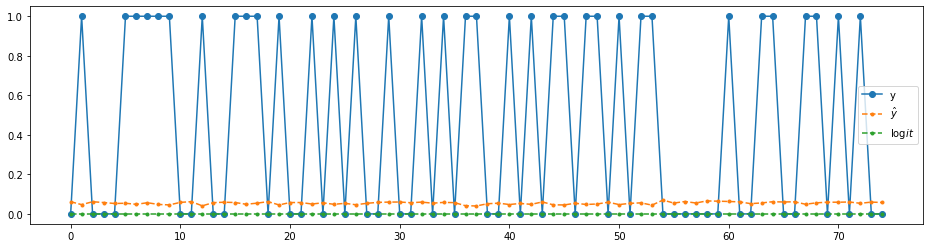

성능:  (0.4666666666666667, 0.5333333333333333)


In [74]:
model = Perceptron()

model.init_weights(X_train)
model.draw_dflow(X_train, y_train, figsize=(16,4))
print('성능: ', model.evaluate(X_train, y_train))

### **학습**

In [75]:
history = model.fit(X_train, y_train, epochs=40)

[Epoch 39] loss: 0.0  acc: 1.0


### **학습 후 성능평가**

성능:  (0.0, 1.0)


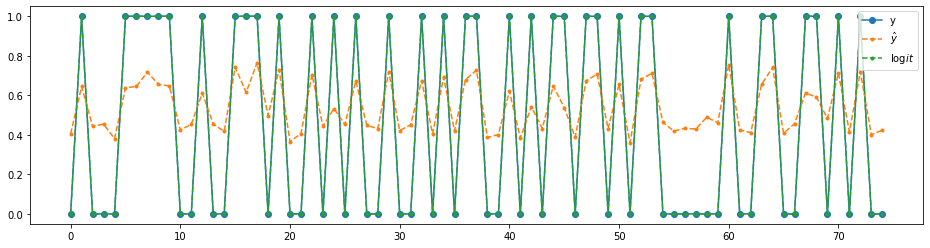

In [76]:
print('성능: ', model.evaluate(X_train, y_train))
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **학습곡선**

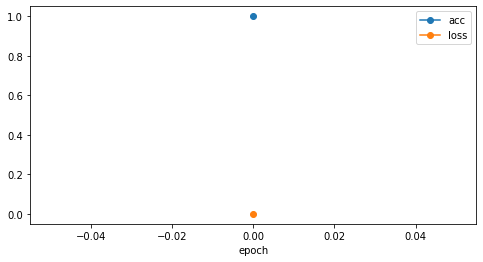

In [77]:
model.draw_lcurve()

### **테스트셋 성능평가**

성능:  (0.0, 1.0)


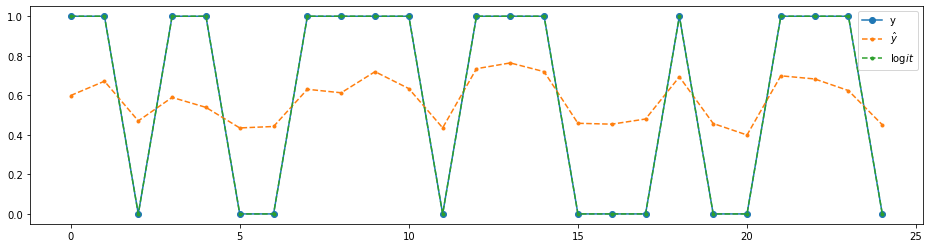

In [78]:
print('성능: ', model.evaluate(X_test, y_test))
model.draw_dflow(X_test, y_test, figsize=(16,4))

### **하이퍼파라미터에 따른 성능평가**

In [79]:
for lr in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
  model = Perceptron(lr=lr)
  history = model.fit(X_train, y_train, epochs=40)
  print(f'===== lr {lr} ==== {model.evaluate(X_test, y_test)}')

[Epoch 39] loss: 0.04  acc: 0.96
===== lr 1e-05 ==== (0.04, 0.96)
[Epoch 39] loss: 0.0  acc: 1.0
===== lr 0.0001 ==== (0.0, 1.0)
[Epoch 39] loss: 0.0  acc: 1.0
===== lr 0.001 ==== (0.0, 1.0)
[Epoch 39] loss: 0.0  acc: 1.0
===== lr 0.01 ==== (0.0, 1.0)
[Epoch 39] loss: 0.0  acc: 1.0
===== lr 0.1 ==== (0.0, 1.0)
